# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combine_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_of_mice = combine_df['Mouse ID'].nunique()
number_of_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='last') == True,['Mouse ID']].drop_duplicates()
duplicate_mouse_id

,Mouse ID
908,g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_g989_df = combine_df.loc[combine_df['Mouse ID'] == 'g989', :]
combine_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_g989_index = combine_df[(combine_df['Mouse ID'] == 'g989')].index
combine_clean_df = combine_df.drop(combine_df.index[combine_g989_index])
combine_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = combine_clean_df['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
combine_clean_gb = combine_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
combine_clean_gb.columns = combine_clean_gb.columns.droplevel(0)
combine_clean_gb.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.',
                                       'sem': 'Tumor Volume Std. Err.'}, inplace=True)
combine_clean_gb

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
combine_clean_single_line_df = combine_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
combine_clean_single_line_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

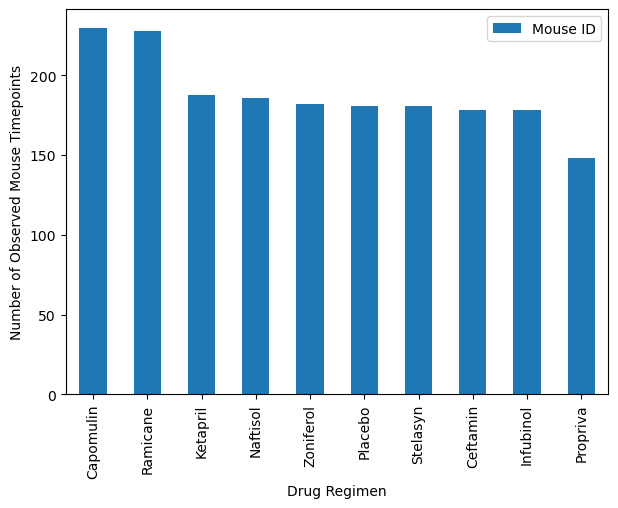

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
combine_clean_bar = combine_clean_df.groupby('Drug Regimen', as_index=False)['Mouse ID'].count()
combine_clean_bar.sort_values(by='Mouse ID', ascending=False, inplace=True)
combine_clean_bar = combine_clean_bar.set_index('Drug Regimen')
# combine_clean_bar.head()
combine_clean_bar.plot(kind="bar", figsize=(7,5), ylabel='Number of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

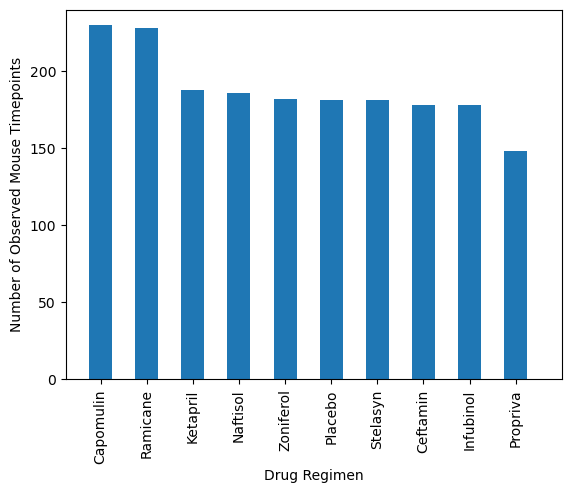

<Figure size 640x480 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
combine_clean_bar = combine_clean_df.groupby('Drug Regimen', as_index=False)['Mouse ID'].count()
combine_clean_bar.sort_values(by='Mouse ID', ascending=False, inplace=True)
x_axis = np.arange(len(combine_clean_bar))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, combine_clean_bar['Mouse ID'], width=.5, align="center")
plt.xticks(tick_locations, combine_clean_bar['Drug Regimen'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(combine_clean_bar['Mouse ID'])+10)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

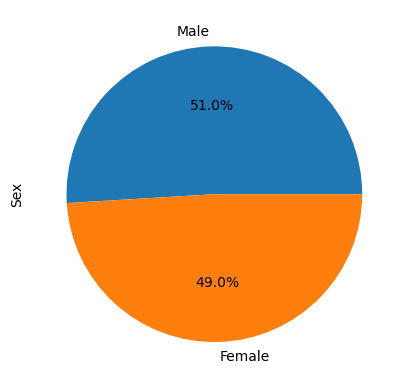

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = combine_clean_df.groupby(['Sex'])['Sex'].count()
male_vs_female_sort = male_vs_female.sort_values(ascending=False)
male_vs_female_sort.plot(kind='pie', y='Sex', autopct='%1.1f%%')

plt.show()


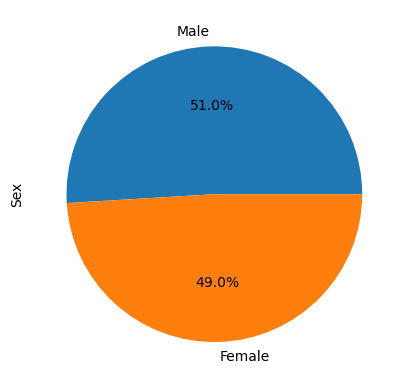

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = combine_clean_df.groupby('Sex', as_index=False)['Mouse ID'].count()
male_vs_female_sort = male_vs_female.sort_values('Mouse ID', ascending=False)
labels = male_vs_female_sort['Sex'].to_numpy()
Sex = male_vs_female_sort['Mouse ID'].to_numpy()
plt.pie(Sex, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen = combine_clean_df.loc[(combine_clean_df['Drug Regimen'] == 'Capomulin') |
                                    (combine_clean_df['Drug Regimen'] == 'Ramicane') |
                                    (combine_clean_df['Drug Regimen'] == 'Infubinol') |
                                    (combine_clean_df['Drug Regimen'] == 'Ceftamin') ]
tumor_volume = drug_regimen.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)['Tumor Volume (mm3)'].agg('last')
tumor_volume.rename(columns={'Tumor Volume (mm3)':'Last Tumor Volume'}, inplace=True)

# Start by getting the last (greatest) timepoint for each mouse
time_point = drug_regimen.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)['Timepoint'].agg('last')
time_point.rename(columns={'Timepoint':'Last Timepoint'}, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last_timepoint = pd.merge(tumor_volume, time_point,on=['Drug Regimen', 'Mouse ID'], how='outer')


  Drug Regimen Mouse ID  Last Tumor Volume  Last Timepoint
0    Capomulin     b128          38.982878              45
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
305     b128    Capomulin  Female           9          22         25   
306     b128    Capomulin  Female           9          22         30   
307     b128    Capomulin  Female           9          22         35   
308     b128    Capomulin  Female           9          22         40   
309     b128    Capomulin  Female           9          22         45   

     Tumor Volume (mm3)  Metastatic Sites  
300           45.000000                 0  
3

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = drug_regimen.groupby('Drug Regimen')['Drug Regimen'].agg('first').to_list()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# vol_outliers = tumor_last_timepoint
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
quartiles = tumor_last_timepoint.quantile([.25,.5,.75])
quartiles
vol_lowerq = quartiles.loc[.25,'Last Tumor Volume']
vol_upperq = quartiles.loc[.75,'Last Tumor Volume']
iqr = vol_upperq-vol_lowerq
vol_lower_bound = vol_lowerq - (1.5*iqr)
vol_upper_bound = vol_upperq + (1.5*iqr)
print(f"Values below {vol_lower_bound} could be outliers.")
print(f"Values above {vol_upper_bound} could be outliers.")
print(tumor_last_timepoint.head())
vol_outliers = tumor_last_timepoint.loc[(tumor_last_timepoint['Last Tumor Volume'] > vol_upper_bound) | (tumor_last_timepoint['Last Tumor Volume'] < vol_lower_bound)]
print("Capomulin's potential outliers: ", vol_outliers.loc[vol_outliers['Drug Regimen'] == 'Capomulin','Last Tumor Volume'])
print("Ramicane's potential outliers: ", vol_outliers.loc[vol_outliers['Drug Regimen'] == 'Ramicane','Last Tumor Volume'])
print("Infubinol's potential outliers: ", vol_outliers.loc[vol_outliers['Drug Regimen'] == 'Infubinol','Last Tumor Volume'])
print("Ceftamin's potential outliers: ", vol_outliers.loc[vol_outliers['Drug Regimen'] == 'Ceftamin','Last Tumor Volume'])
vol_outliers


Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
  Drug Regimen Mouse ID  Last Tumor Volume  Last Timepoint
0    Capomulin     b128          38.982878              45
1    Capomulin     b742          38.939633              45
2    Capomulin     f966          30.485985              20
3    Capomulin     g288          37.074024              45
4    Capomulin     g316          40.159220              45
Capomulin's potential outliers:  Series([], Name: Last Tumor Volume, dtype: float64)
Ramicane's potential outliers:  Series([], Name: Last Tumor Volume, dtype: float64)
Infubinol's potential outliers:  Series([], Name: Last Tumor Volume, dtype: float64)
Ceftamin's potential outliers:  Series([], Name: Last Tumor Volume, dtype: float64)


C:\Users\inlik\AppData\Local\Temp\ipykernel_1328\2328287387.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = tumor_last_timepoint.quantile([.25,.5,.75])


,Drug Regimen,Mouse ID,Last Tumor Volume,Last Timepoint


In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
